In [38]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math

C:\Users\scanimage\AppData\Local\Temp\ipykernel_21368\302103531.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [42]:
data_directory = r"F:\\JJM\\miniscope_analysis\\mGluR5_NAM\\clustering_analysis\\all_frames_2023-02-23-10-01-50_analysisOutput"


In [43]:

Vehicle_sessions = ['Vehicle_DIO_r2.7_15_20_30', 'Vehicle_DIO_r2.7_15_51_07',
                   'Vehicle_DIO_r2.8_16_45_11', 'Vehicle_DIO_r2.8_17_16_03',
                   'Vehicle_DIO_r2.14_17_25_26', 'Vehicle_DIO_r2.14_17_40_46', 'Vehicle_DIO_r2.14_18_11_01'] ; 

Fenobam_sessions = ['Fenobam_DIO_r2.7_17_00_12', 'Fenobam_DIO_r2.7_17_30_50',
                   'Fenobam_DIO_r2.8_16_00_28', 'Fenobam_DIO_r2.8_16_30_39', 
                   'Fenobam_DIO_r2.14_14_00_13', 'Fenobam_DIO_r2.14_14_30_28'] ;

## compile and plot genotype data

In [44]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_veh = {}
for session in Vehicle_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+r"\\"+session+r"*normlBinnedCellJaccards.csv"):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_veh[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_drug = {}
for session in Fenobam_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+r"\\"+session+r"*normlBinnedCellJaccards.csv"):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_drug[session] = session_output

Vehicle_DIO_r2.7_15_20_30
Vehicle_DIO_r2.7_15_51_07
Vehicle_DIO_r2.8_16_45_11
Vehicle_DIO_r2.8_17_16_03
Vehicle_DIO_r2.14_17_25_26
Vehicle_DIO_r2.14_17_40_46
Vehicle_DIO_r2.14_18_11_01
Fenobam_DIO_r2.7_17_00_12
Fenobam_DIO_r2.7_17_30_50
Fenobam_DIO_r2.8_16_00_28
Fenobam_DIO_r2.8_16_30_39
Fenobam_DIO_r2.14_14_00_13
Fenobam_DIO_r2.14_14_30_28


In [54]:
jaccard_analysis_by_session_drug

{'Fenobam_DIO_r2.7_17_00_12': {'normlBinnedCellJaccards':         0       1       2       3       4       5       6       7       8
  0  11.861  8.2407  7.7727  7.2886  6.8082  7.5463  7.1508  8.4395  5.5165},
 'Fenobam_DIO_r2.7_17_30_50': {'normlBinnedCellJaccards':         0       1       2       3       4       5       6   7   8
  0  9.4997  8.7992  7.0996  5.5117  5.2295  3.8283  1.7334 NaN NaN},
 'Fenobam_DIO_r2.8_16_00_28': {'normlBinnedCellJaccards':        0       1       2       3       4       5      6   7   8
  0  23.08  8.3166  4.2912  5.1425  7.5826  7.6135  7.102 NaN NaN},
 'Fenobam_DIO_r2.8_16_30_39': {'normlBinnedCellJaccards':         0       1      2       3       4       5   6   7   8
  0  25.509  9.3626  2.502  5.4375  7.8414  9.6012 NaN NaN NaN},
 'Fenobam_DIO_r2.14_14_00_13': {'normlBinnedCellJaccards':         0       1       2       3       4       5       6       7       8
  0  9.6757  6.0236  5.1782  4.6922  4.3705  4.1386  4.0803  4.9426  8.8392},
 'Fenobam_D

In [56]:
#plot across sessions
vehicle_compiled = pd.concat([jaccard_analysis_by_session_veh[session]['normlBinnedCellJaccards'] for session in Vehicle_sessions], keys=Vehicle_sessions)
drug_compiled = pd.concat([jaccard_analysis_by_session_drug[session]['normlBinnedCellJaccards'] for session in Fenobam_sessions], keys=Fenobam_sessions)

In [47]:
#genotype_compiled_ko

In [57]:
#average multiple sessions by time

#veh 
veh_by_day = {}
veh_by_day['DIO_r2.7'] = pd.DataFrame(vehicle_compiled.loc[['Vehicle_DIO_r2.7_15_20_30','Vehicle_DIO_r2.7_15_51_07']].mean(axis=0)).transpose()
veh_by_day['DIO_r2.8'] = pd.DataFrame(vehicle_compiled.loc[['Vehicle_DIO_r2.8_16_45_11','Vehicle_DIO_r2.8_17_16_03', ]].mean(axis=0)).transpose()
veh_by_day['DIO_r2.14'] = pd.DataFrame(vehicle_compiled.loc[['Vehicle_DIO_r2.14_17_25_26','Vehicle_DIO_r2.14_17_40_46', 'Vehicle_DIO_r2.14_18_11_01']].mean(axis=0)).transpose()

#ko 
drug_by_day = {}
drug_by_day['DIO_r2.7'] = pd.DataFrame(drug_compiled.loc[['Fenobam_DIO_r2.7_17_00_12','Fenobam_DIO_r2.7_17_30_50']].mean(axis=0)).transpose()
drug_by_day['DIO_r2.8'] = pd.DataFrame(drug_compiled.loc[['Fenobam_DIO_r2.8_16_00_28','Fenobam_DIO_r2.8_16_30_39' ]].mean(axis=0)).transpose()
drug_by_day['DIO_r2.14'] = pd.DataFrame(drug_compiled.loc[['Fenobam_DIO_r2.14_14_00_13','Fenobam_DIO_r2.14_14_30_28']].mean(axis=0)).transpose()

veh_by_day_df = pd.concat(veh_by_day.values(), keys=veh_by_day.keys())
drug_by_day_df = pd.concat(drug_by_day.values(), keys=drug_by_day.keys())

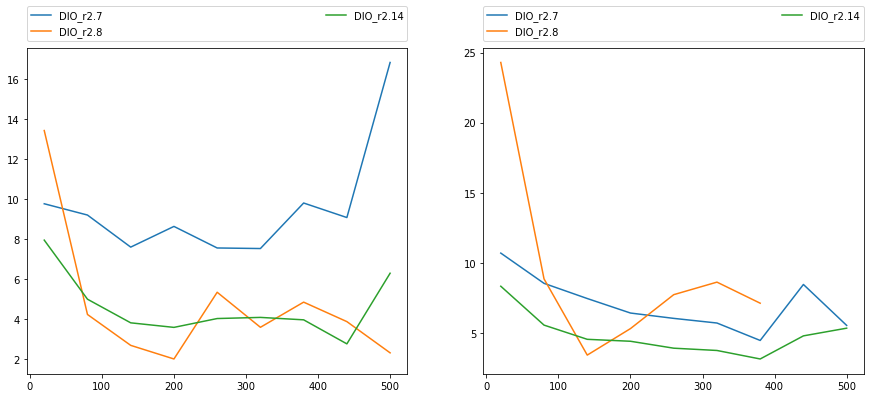

In [59]:
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(veh_by_day_df)):
    bin_vector = np.linspace(20, 500, len(veh_by_day_df.iloc[session,:].values))
    plt.plot(bin_vector, veh_by_day_df.iloc[session,:].values, label=list(veh_by_day_df.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(drug_by_day_df)):
    bin_vector = np.linspace(20, 500, len(drug_by_day_df.iloc[session,:].values))
    plt.plot(bin_vector, drug_by_day_df.iloc[session,:].values, label=list(drug_by_day_df.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_bysession_sidebyside_indiv_creoff.pdf', transparent=True)
plt.show()

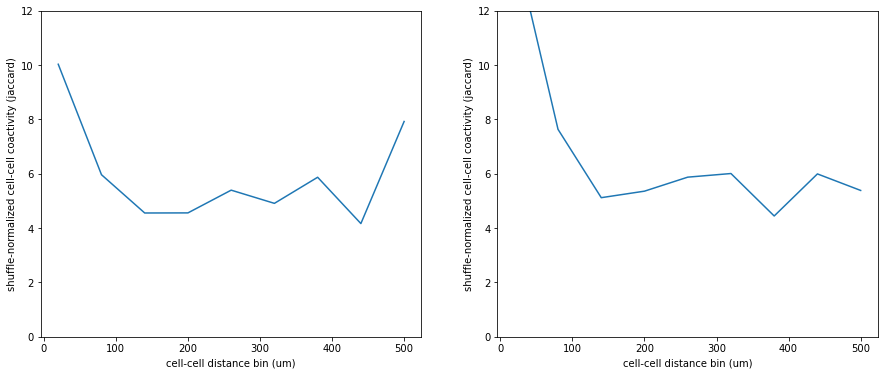

In [49]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, vehicle_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, fenobam_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))


fig.set_size_inches(15, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_sidebyside_group_creoff.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

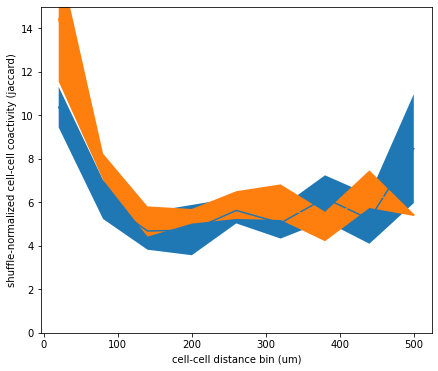

In [63]:
mean = veh_by_day_df.mean()
mean_ko = drug_by_day_df.mean()
std_error = veh_by_day_df.std()/math.sqrt(9)
std_error_ko = drug_by_day_df.std()/math.sqrt(9)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,15))
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/combined_coactivity_creoff.pdf', transparent=True)
plt.show()